In [90]:
import keras as k
import scipy

In [91]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint, EarlyStopping


from keras.models import Sequential
from keras.layers import Dense, Activation
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

dumpfiles(home=home, fsize=9, phi=0.1, dp = 75, timestep=0.6)

dumpfiles(home=home, fsize=9, phi=0.1, dp = 75, timestep=0.65)

dumpfiles(home=home, fsize=9, phi=0.1, dp = 150, timestep=0.65)

dumpfiles(home=home, fsize=9, phi=0.1, dp = 300, timestep=0.65)

dumpfiles(home=home, fsize=9, phi=0.3, dp = 75, timestep=0.425)

In [105]:
home = '/home/nandhini/aozel/periodicBox'
fsize = 5
phi=0.3
dp = 75
timestep=0.4
cohesion = ''
data_signature = 'fsize' + str(fsize)+'phi'+str(phi)+'dp'+str(dp)+'timestep'+str(timestep) + cohesion
model_signature = 'fsize' + str(9)+'phi'+str(0.1)+'dp'+str(75)+'timestep'+str(0.6)
file_myData = "myDataUslip"+data_signature+".pickle"
file_target = "targetUslip"+data_signature+".pickle"

myData = pickle.load( open( file_myData, "rb" ) )
target = pickle.load( open( file_target, "rb" ) )

In [106]:
X_train, X_test, y_train, y_test = train_test_split(myData, target, test_size=0.02, random_state=42)
X_realCV, X_realTT, y_realCV, y_realTT = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [107]:
scaler = pickle.load( open( 'scale'+model_signature, "rb" ) )
X_realTT_norm = scaler.transform(X_realTT)

In [108]:
X_realTT_norm.shape

(19348, 108)

In [109]:
model = Sequential()
model.add(Dense(100, activation='relu', kernel_initializer='normal',input_dim=X_realTT_norm.shape[-1]))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dense(32, activation='relu', kernel_initializer='normal'))
model.add(Dense(16, activation='relu', kernel_initializer='normal'))
model.add(Dense(8, activation='relu', kernel_initializer='normal'))
model.add(Dense(4, activation='relu', kernel_initializer='normal'))
model.add(Dense(1, activation='linear', kernel_initializer='normal'))
model.compile(loss='mean_absolute_error', optimizer='Adadelta')
save_file = 'weights_Uslip3'+ model_signature + '.hdf5'
model.load_weights(save_file)

(-1, 1)

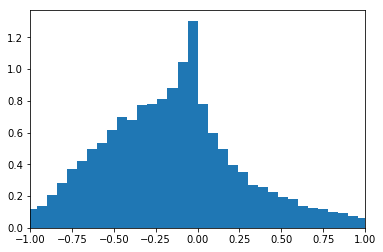

In [111]:
y_predict = model.predict(X_realTT_norm)
error_percent = (y_predict.reshape(-1)- y_realTT.reshape(-1))/y_realTT.reshape(-1)
errpd = plt.hist(error_percent,1000,range=(-30, 30), normed=True)
plt.xlim([-1, 1])

In [112]:
model = Sequential()

model.add(Dense(100, activation='relu', kernel_initializer='normal',input_dim=X_realTT_norm.shape[-1]))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(100, activation='relu', kernel_initializer='normal'))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dense(32, activation='relu', kernel_initializer='normal'))
model.add(Dense(16, activation='relu', kernel_initializer='normal'))
model.add(Dense(8, activation='relu', kernel_initializer='normal'))
model.add(Dense(4, activation='relu', kernel_initializer='normal'))
model.add(Dense(1, activation='linear', kernel_initializer='normal'))
model.compile(loss='mean_absolute_error', optimizer='Adam')
file = 'weights_Uslip3' + str(fsize) + '.hdf5'
model.load_weights(file)
#checkpointer = ModelCheckpoint(filepath=file, verbose=1, save_best_only=True)
#model.fit(X_train_norm, y_train, batch_size=128, epochs=60, verbose=1, validation_data=(X_realCV_norm, y_realCV), callbacks=[checkpointer])

OSError: Unable to open file (Unable to open file: name = 'weights_uslip35.hdf5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

$\phi$ = 0.1, d = 75 mm, time = 0.6



In [ ]:
y_predict = model.predict(X_realTT_norm)
error_percent = (y_predict.reshape(-1) - y_realTT.reshape(-1))/y_realTT.reshape(-1)
errpd = plt.hist(error_percent,4000,normed=True)
plt.xlim([-2, 2])

$\phi$ = 0.1, d = 75 mm, time = 0.65



In [ ]:
y_predict = model.predict(X_realTT_norm)
error_percent = (y_predict.reshape(-1) - y_realTT.reshape(-1))/y_realTT.reshape(-1)
errpd = plt.hist(error_percent,4000,normed=True)
plt.xlim([-2, 2])

$\phi$ = 0.1, d = 150 mm, time = 0.65




In [ ]:
y_predict = model.predict(X_realTT_norm)
error_percent = (y_predict.reshape(-1) - y_realTT.reshape(-1))/y_realTT.reshape(-1)
errpd = plt.hist(error_percent,4000,normed=True)
plt.xlim([-2, 2])

$\phi$ = 0.1, d = 300 mm, time = 0.65



In [ ]:
y_predict = model.predict(X_realTT_norm)
error_percent = (y_predict.reshape(-1) - y_realTT.reshape(-1))/y_realTT.reshape(-1)
errpd = plt.hist(error_percent,4000,normed=True)
plt.xlim([-2, 2])

In [ ]:
y_predict = model.predict(X_realTT_norm)
error_percent = (y_predict.reshape(-1) - y_realTT.reshape(-1)/4)/(y_realTT.reshape(-1)/4)
errpd = plt.hist(error_percent,4000,normed=True)
plt.xlim([-2, 2])

In [ ]:
y_predict = model.predict(X_realTT_norm)
error_percent = (y_predict.reshape(-1) - y_realTT.reshape(-1))/y_realTT.reshape(-1)
errpd = plt.hist(error_percent,4000,normed=True)
plt.xlim([-2, 6])

$\phi$ = 0.1, d = 75 mm, time = 0.7




In [ ]:
y_predict = model.predict(X_realTT_norm)
error_percent = (y_predict.reshape(-1) - y_realTT.reshape(-1))/y_realTT.reshape(-1)
errpd = plt.hist(error_percent,4000,normed=True)
plt.xlim([-2, 2])

In [63]:
model.predict(np.zeros([1,108]))

array([[ 0.62315893]], dtype=float32)

In [65]:
pred = model.predict(np.identity(108)*0.01)

In [89]:
np.argsort(np.abs(model.predict(np.identity(108)*0.001) - model.predict(np.zeros([1,108]))).reshape(-1))[::-1] + 1

array([100,  56,  76,  60,  12,  68,  96,  72,  92,  28, 108,  84,  36,
         4, 101, 105,  33,  83,  88,  34,  20,  69,  26,  77,  82,   1,
        99,  65,  75, 104,  93,   8,  52,  89,  80,   2,  87,  40,  11,
        53,   3,  57,  44,  13,  81,  97,  63,  41,  64,  22,  39,  91,
         9,  21,  14,  61,  86,  15,  47,  95,  70,  29,  62,  94,  30,
        55,  85,  27, 106,   6,  45,  46,  18,  98,  51, 103,  25,  37,
        54,  73,  35,  38,  48,  67,  24,  32,  19,  42,   7,  59,  90,
        23, 102,  17,  10, 107,  71,  58,  16,   5,  49,  31,  43,  74,
        78,  50,  79,  66])

In [79]:
np.argsort(np.abs(model.predict(np.identity(108)*0.1) - model.predict(np.zeros([1,108]))).reshape(-1))[::-1]

array([ 55,  59,  67,  99,  91,  75,  71,  95,  11,  83, 107,  27,  32,
       100,   3,  82,  98,  76, 104,   0,  68,  25,  87,  64,  33,  74,
        81,  51, 103,  86,  19,   1,  88,   2,  35,   7,  39,  79,  20,
        43,  62,  56,  12,  10, 105,  40,  21,  90,  80,  85,  61,  13,
        92,  60,  93,  96,  28,  38,  52,  26,  14,  94,  69,  46,   8,
        63,  29, 106,   5,  17,  54,  45,  44,  72,  36,  50,  84,  53,
       102,  24,  97,  34,  48,  37,  70,  66,  18,  41,   6,   9,  58,
        31,  89,  65,  15,  16,  57,  23,  47,  22,  42,   4, 101,  30,
        73,  77,  49,  78])

In [86]:
np.argsort(np.abs(model.predict(np.identity(108)*(-0.01)) - model.predict(np.zeros([1,108]))).reshape(-1))[::-1]

array([ 99,  55,  75,  59,  11,  67,  95,  71,  91,  27, 107,  83,  35,
         3, 100, 104,  32,  82,  87,  33,  19,  68,  25,  76,  81,   0,
        98,  64,  74, 103,  92,   7,  51,  88,  79,   1,  86,  39,  10,
        52,   2,  56,  43,  12,  80,  96,  62,  40,  63,  21,  90,  38,
         8,  20,  13,  60,  85,  14,  46,  94,  69,  28,  61,  93,  29,
        54,  84,  26, 105,   5,  44,  45,  17,  97,  50, 102,  24,  36,
        53,  72,  34,  37,  47,  66,  23,  31,  18,  41,   6,  58,  89,
        22, 101,  16, 106,   9,  70,  57,  15,   4,  48,  30,  42,  73,
        77,  49,  78,  65])